In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [35]:
train_demo = pd.read_excel(r'C:\Users\danie\Desktop\Mestrado\1º Semestre\Machine Learning\Projeto\Dados\train_demo.xlsx')
train_habits = pd.read_excel(r'C:\Users\danie\Desktop\Mestrado\1º Semestre\Machine Learning\Projeto\Dados\train_habits.xlsx')
train_health = pd.read_excel(r'C:\Users\danie\Desktop\Mestrado\1º Semestre\Machine Learning\Projeto\Dados\train_health.xlsx')

In [10]:
train_demo

,PatientID,Name,Birth_Year,Region,Education,Disease
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1
3,1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0
4,1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1
...,...,...,...,...,...,...
795,1909,Mr. Philip Klink,1972,East Midlands,High School Incomplete (10th to 11th grade),0
796,1386,Mrs. Jackie Valencia,1980,North West,Elementary School (1st to 9th grade),1
797,1088,Mrs. Cheryl Harris,1860,East Midlands,Elementary School (1st to 9th grade),0
798,1662,Mr. Florencio Doherty,1975,East of England,Elementary School (1st to 9th grade),1


In [11]:
train_habits

,PatientID,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
0,1167,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1,1805,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
2,1557,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
3,1658,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
4,1544,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter
...,...,...,...,...,...,...
795,1909,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
796,1386,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters
797,1088,No,I consider myself a social drinker,No,3 to 4 pieces of fruit in average,More than half a liter but less than one liter
798,1662,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter


In [12]:
train_health

,PatientID,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
2,1557,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
3,1658,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...
4,1544,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...
...,...,...,...,...,...,...,...,...,...
795,1909,178,61,204,144,12,4,Not sure,Neither I nor my immediate family have diabetes.
796,1386,157,61,213,120,23,0,More than 3 years,I have/had pregnancy diabetes or borderline di...
797,1088,167,48,272,140,20,17,More than 3 years,Neither I nor my immediate family have diabetes.
798,1662,165,75,208,112,16,0,More than 3 years,Neither I nor my immediate family have diabetes.


In [36]:
train_merged_aux1 =pd.merge(train_demo,train_habits,on='PatientID')
train_patient =pd.merge(train_merged_aux1,train_health,on='PatientID')
train_patient

,PatientID,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
3,1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...
4,1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1909,Mr. Philip Klink,1972,East Midlands,High School Incomplete (10th to 11th grade),0,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,178,61,204,144,12,4,Not sure,Neither I nor my immediate family have diabetes.
796,1386,Mrs. Jackie Valencia,1980,North West,Elementary School (1st to 9th grade),1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,157,61,213,120,23,0,More than 3 years,I have/had pregnancy diabetes or borderline di...
797,1088,Mrs. Cheryl Harris,1860,East Midlands,Elementary School (1st to 9th grade),0,No,I consider myself a social drinker,No,3 to 4 pieces of fruit in average,More than half a liter but less than one liter,167,48,272,140,20,17,More than 3 years,Neither I nor my immediate family have diabetes.
798,1662,Mr. Florencio Doherty,1975,East of England,Elementary School (1st to 9th grade),1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,165,75,208,112,16,0,More than 3 years,Neither I nor my immediate family have diabetes.


In [37]:
train_patient

,PatientID,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
3,1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...
4,1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1909,Mr. Philip Klink,1972,East Midlands,High School Incomplete (10th to 11th grade),0,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,178,61,204,144,12,4,Not sure,Neither I nor my immediate family have diabetes.
796,1386,Mrs. Jackie Valencia,1980,North West,Elementary School (1st to 9th grade),1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,157,61,213,120,23,0,More than 3 years,I have/had pregnancy diabetes or borderline di...
797,1088,Mrs. Cheryl Harris,1860,East Midlands,Elementary School (1st to 9th grade),0,No,I consider myself a social drinker,No,3 to 4 pieces of fruit in average,More than half a liter but less than one liter,167,48,272,140,20,17,More than 3 years,Neither I nor my immediate family have diabetes.
798,1662,Mr. Florencio Doherty,1975,East of England,Elementary School (1st to 9th grade),1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,165,75,208,112,16,0,More than 3 years,Neither I nor my immediate family have diabetes.


In [38]:
train_patient.set_index('PatientID', inplace = True)

In [39]:
train_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

In [40]:
train_patient.duplicated().value_counts()

False    800
dtype: int64

In [41]:
train_patient["Name"].duplicated().value_counts()

False    799
True       1
Name: Name, dtype: int64

In [42]:
train_patient[(train_patient.Name == "Mr. Gary Miller")]

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,,
1221,Mr. Gary Miller,1959,North West,University Complete (3 or more years),0,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,Less than half a liter,172,65,258,130,17,6,Not sure,Neither I nor my immediate family have diabetes.
1694,Mr. Gary Miller,1983,South West,I never attended school / Other,0,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,178,61,223,118,15,5,Not sure,Neither I nor my immediate family have diabetes.


In [43]:
undesireable_char = ["!","$","%","?","*","+","_","@","€"," ","{"]
a = train_patient.replace(undesireable_char,np.nan, inplace=True)

In [45]:
print(a)

None


In [46]:
print((train_patient["Education"].value_counts()/len(train_patient["Education"])*100).round(2))
print(train_patient["Drinking_Habit"].value_counts())
print(train_patient["Fruit_Habit"].value_counts())
print(train_patient["Checkup"].value_counts())
print(train_patient["Diabetes"].value_counts())

University Complete (3 or more years)          29.88
High School Graduate                           24.50
Elementary School (1st to 9th grade)           22.88
High School Incomplete (10th to 11th grade)    12.75
University Incomplete (1 to 2 years)            4.62
I never attended school / Other                 3.75
Name: Education, dtype: float64
I usually consume alcohol every day     406
I consider myself a social drinker      383
I do not consume any type of alcohol     11
Name: Drinking_Habit, dtype: int64
Less than 1. I do not consume fruits every day.    452
1 to 2 pieces of fruit in average                  175
3 to 4 pieces of fruit in average                  105
5 to 6 pieces of fruit in average                   56
More than six pieces of fruit                       12
Name: Fruit_Habit, dtype: int64
More than 3 years                         429
Not sure                                  312
Less than 3 years but more than 1 year     53
Less than three months                

In [19]:
train_patient.isna().sum()

Name                 0
Birth_Year           0
Region               0
Education           13
Disease              0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
dtype: int64

In [21]:
#Create variable Gender
gender = []

for elem in train_patient['Name']:
        if "Mr." in elem:
            gender.append("M")
    
        elif "Miss" in elem:
            gender.append("F")

        elif "Mrs." in elem:
            gender.append("F")
    
gender = np.asarray(gender)

train_patient['Gender'] = gender

print(train_patient['Gender'])

PatientID
1167    F
1805    M
1557    M
1658    M
1544    M
       ..
1909    M
1386    F
1088    F
1662    M
1117    M
Name: Gender, Length: 800, dtype: object


In [22]:
train_patient['Age'] = datetime.now().year -train_patient['Birth_Year'] 
print(train_patient['Age'])

PatientID
1167     57
1805     53
1557     48
1658     64
1544     54
       ... 
1909     50
1386     42
1088    162
1662     47
1117     43
Name: Age, Length: 800, dtype: int64


In [69]:
#Create variable BMI     
train_patient['BMI'] = (train_patient['Weight']/(train_patient['Height']**2)*10000).round(2)

print(train_patient['BMI'])

PatientID
1167    27.89
1805    29.40
1557    25.91
1658    20.37
1544    17.90
        ...  
1912    24.73
1909    19.25
1386    24.75
1662    27.55
1117    23.39
Name: BMI, Length: 788, dtype: float64


In [24]:
 train_patient.drop(train_patient[train_patient["Age"]> 100].index, inplace = True)

In [25]:
train_patient.groupby("Disease").mean()

,Birth_Year,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,BMI
Disease,,,,,,,,,
0,1965.635171,169.312336,65.813648,252.700787,134.112861,14.965879,6.958005,56.364829,22.901969
1,1969.422604,166.523342,69.916462,244.545455,128.363636,19.525799,2.223587,52.577396,25.142703


In [65]:
train_patient.groupby("Age_Cat").mean()

,Birth_Year,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,BMI
Age_Cat,,,,,,,,,,
"Young adult [29,40]",1979.518868,0.683962,168.382075,70.452830,233.443396,123.834906,20.202830,2.900943,42.481132,24.769340
"Adult1 [40,50]",1969.207921,0.589109,167.970297,67.767327,252.732673,130.089109,17.495050,4.599010,52.792079,23.981683
"Adult2 [50,60]",1963.391753,0.298969,168.170103,67.979381,248.072165,136.020619,16.716495,5.262887,58.608247,24.000722
"Senior [60,100]",1956.255556,0.472222,166.838889,65.100000,261.894444,135.677778,14.383333,5.505556,65.744444,23.373278


In [27]:
train_patient[train_patient["Disease"] == 1].describe(include="all")

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,...,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Gender,Age,BMI
count,407,407.000000,407,399,407.0,407,407,407,407,407,...,407.000000,407.000000,407.000000,407.000000,407.000000,407,407,407,407.000000,407.000000
unique,407,NaN,10,6,NaN,2,3,2,5,3,...,NaN,NaN,NaN,NaN,NaN,4,4,2,NaN,NaN
top,Mr. James Willis,NaN,East Midlands,University Complete (3 or more years),NaN,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,...,NaN,NaN,NaN,NaN,NaN,More than 3 years,I have/had pregnancy diabetes or borderline di...,M,NaN,NaN
freq,1,NaN,75,123,NaN,351,248,351,322,188,...,NaN,NaN,NaN,NaN,NaN,321,153,236,NaN,NaN
mean,NaN,1969.422604,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,69.916462,244.545455,128.363636,19.525799,2.223587,NaN,NaN,NaN,52.577396,25.142703
std,NaN,9.624900,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,12.160377,52.185226,15.032164,4.495065,3.280279,NaN,NaN,NaN,9.624900,3.525854
min,NaN,1946.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,41.000000,130.000000,94.000000,5.000000,0.000000,NaN,NaN,NaN,29.000000,17.040000
25%,NaN,1963.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,61.000000,211.000000,120.000000,17.000000,0.000000,NaN,NaN,NaN,44.500000,22.400000
50%,NaN,1970.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,71.000000,238.000000,130.000000,20.000000,0.000000,NaN,NaN,NaN,52.000000,26.030000
75%,NaN,1977.500000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,79.000000,271.500000,138.000000,23.000000,4.000000,NaN,NaN,NaN,59.000000,27.990000


In [28]:
train_patient[train_patient["Disease"] == 0].describe(include="all")

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,...,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Gender,Age,BMI
count,381,381.000000,381,377,381.0,381,381,381,381,381,...,381.000000,381.000000,381.000000,381.000000,381.000000,381,381,381,381.000000,381.000000
unique,380,NaN,10,6,NaN,2,3,2,5,3,...,NaN,NaN,NaN,NaN,NaN,4,4,2,NaN,NaN
top,Mr. Gary Miller,NaN,East Midlands,University Complete (3 or more years),NaN,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,...,NaN,NaN,NaN,NaN,NaN,Not sure,Neither I nor my immediate family have diabetes.,M,NaN,NaN
freq,2,NaN,73,116,NaN,312,221,204,125,171,...,NaN,NaN,NaN,NaN,NaN,239,282,324,NaN,NaN
mean,NaN,1965.635171,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,65.813648,252.700787,134.112861,14.965879,6.958005,NaN,NaN,NaN,56.364829,22.901969
std,NaN,7.820063,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,11.655558,47.581838,18.582260,5.305547,6.057472,NaN,NaN,NaN,7.820063,3.425878
min,NaN,1945.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,40.000000,135.000000,100.000000,0.000000,0.000000,NaN,NaN,NaN,35.000000,16.980000
25%,NaN,1961.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,56.000000,216.000000,120.000000,12.000000,2.000000,NaN,NaN,NaN,52.000000,20.170000
50%,NaN,1964.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,65.000000,251.000000,130.000000,16.000000,6.000000,NaN,NaN,NaN,58.000000,22.480000
75%,NaN,1970.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,73.000000,287.000000,144.000000,19.000000,11.000000,NaN,NaN,NaN,61.000000,25.150000


In [29]:
train_patient.Age.Disease

AttributeError: 'Series' object has no attribute 'Disease'

<Figure size 2250x2250 with 0 Axes>

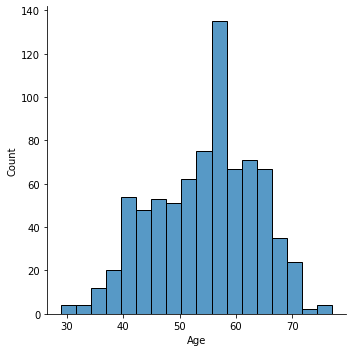

In [30]:
plt.figure(figsize=(15, 15), dpi=150)
sns.displot(train_patient, x="Age")

In [31]:
def Age_categorise(df):
    train_patient['Age_Cat'] = pd.qcut(train_patient.Age, q=4, labels = ['Young adult [29,40]','Adult1 [40,50]','Adult2 [50,60]','Senior [60,100]'])
    
Age_categorise(train_patient)
train_patient['Age_Cat'].dtype

CategoricalDtype(categories=['Young adult [29,40]', 'Adult1 [40,50]', 'Adult2 [50,60]',
                  'Senior [60,100]'],
, ordered=True)

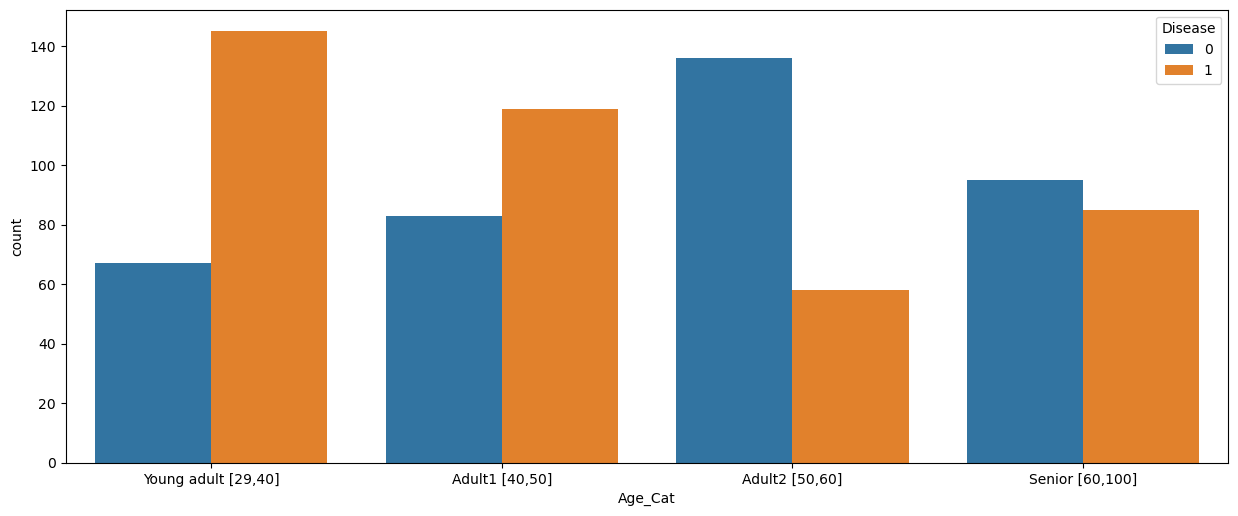

In [32]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Age_Cat", hue = "Disease", data = train_patient)
plt.show()

In [33]:
Age_Cat_counts = pd.DataFrame(train_patient['Age_Cat'].value_counts())
Age_Cat_counts['%'] = (train_patient["Age_Cat"].value_counts()/len(train_patient["Age_Cat"])*100).round(2)
Age_Cat_counts

,Age_Cat,%
"Young adult [29,40]",212,26.90
"Adult1 [40,50]",202,25.63
"Adult2 [50,60]",194,24.62
"Senior [60,100]",180,22.84


In [34]:
Age_Cat_Diseases_counts = pd.DataFrame(train_patient.groupby(['Age_Cat','Disease']).Age_Cat.count())
Age_Cat_Diseases_counts['%'] = (train_patient["Age_Cat"].value_counts()/len(Age_Cat_Diseases_counts["Age_Cat"])*100).round(2)
Age_Cat_Diseases_counts

Age_Cat   %
Age_Cat             Disease             
Young adult [29,40] 0             67 NaN
                    1            145 NaN
Adult1 [40,50]      0             83 NaN
                    1            119 NaN
Adult2 [50,60]      0            136 NaN
                    1             58 NaN
Senior [60,100]     0             95 NaN
                    1             85 NaN

In [35]:
train_patient_test

NameError: name 'train_patient_test' is not defined

In [36]:
def Colesterol_categorise(df):
    train_patient['Cholesterol_Cat'] = pd.cut(train_patient.High_Cholesterol, bins = [0,200,240,float("inf")], labels = ['Desirable','Borderline High','High'])
    
Colesterol_categorise(train_patient)
train_patient['Cholesterol_Cat'].dtype

CategoricalDtype(categories=['Desirable', 'Borderline High', 'High'], ordered=True)

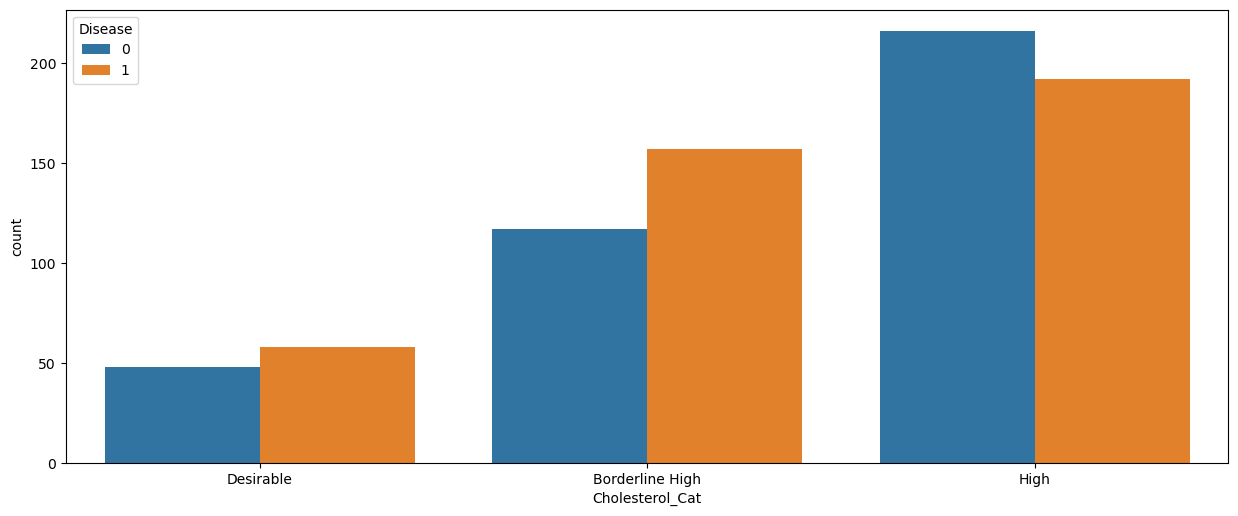

In [37]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Cholesterol_Cat", hue = "Disease", data = train_patient)
plt.show()

In [38]:
Cholesterol_Cat_counts = pd.DataFrame(train_patient['Cholesterol_Cat'].value_counts())
Cholesterol_Cat_counts['%'] = (train_patient["Cholesterol_Cat"].value_counts()/len(train_patient["Cholesterol_Cat"])*100).round(2)
Cholesterol_Cat_counts.style.set_caption("Cholesterol Categories")
Cholesterol_Cat_counts

,Cholesterol_Cat,%
High,408,51.78
Borderline High,274,34.77
Desirable,106,13.45


In [39]:
train_patient.Mental_Health.describe()

count    788.000000
mean      17.321066
std        5.405039
min        0.000000
25%       13.000000
50%       18.000000
75%       21.000000
max       29.000000
Name: Mental_Health, dtype: float64

In [40]:
def Mental_Health_categorise(df):
    train_patient['Mental_Health_Cat'] = pd.qcut(train_patient.Mental_Health, q=4, labels = ['Good','Medium','Bad','Very bad'])
    
Mental_Health_categorise(train_patient)
train_patient['Mental_Health_Cat'].dtype

CategoricalDtype(categories=['Good', 'Medium', 'Bad', 'Very bad'], ordered=True)

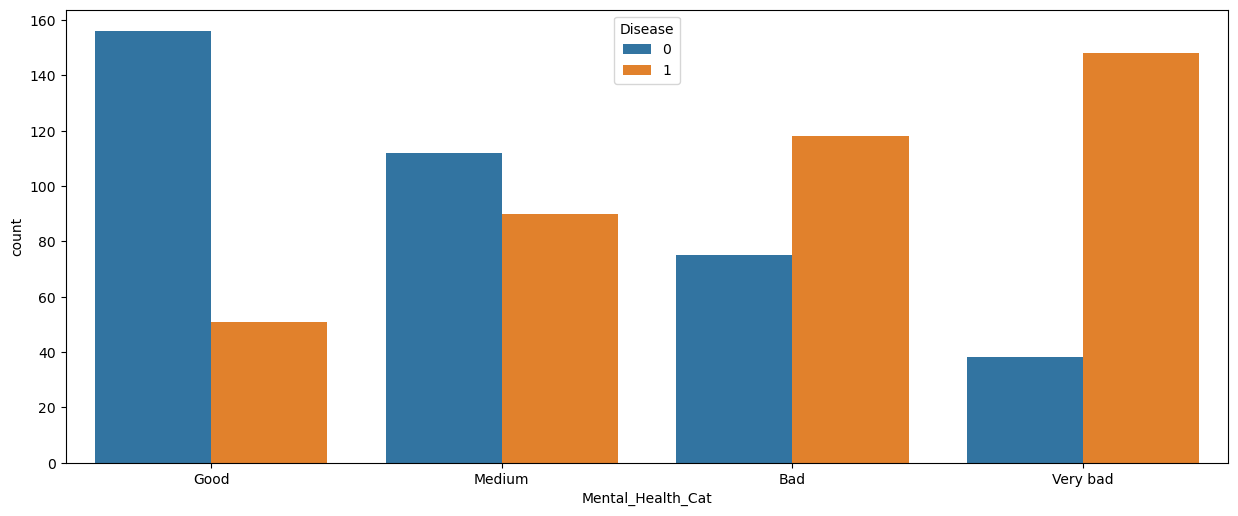

In [41]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Mental_Health_Cat", hue = "Disease", data = train_patient)
plt.show()

In [42]:
Mental_Health_Cat_counts = pd.DataFrame(train_patient['Mental_Health_Cat'].value_counts())
Mental_Health_Cat_counts['%'] = (train_patient["Mental_Health_Cat"].value_counts()/len(train_patient["Mental_Health_Cat"])*100).round(2)
Mental_Health_Cat_counts

,Mental_Health_Cat,%
Good,207,26.27
Medium,202,25.63
Bad,193,24.49
Very bad,186,23.60


In [43]:
train_patient.Physical_Health.describe()

count    788.000000
mean       4.512690
std        5.373339
min        0.000000
25%        0.000000
50%        3.000000
75%        7.000000
max       30.000000
Name: Physical_Health, dtype: float64

<Figure size 2250x2250 with 0 Axes>

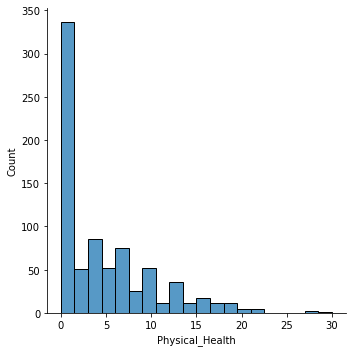

In [44]:
plt.figure(figsize=(15, 15), dpi=150)
sns.displot(train_patient, x="Physical_Health")

In [45]:
def Physical_Health_categorise(df):
    train_patient['Physical_Health_Cat'] = pd.cut(train_patient.Physical_Health, bins = [0,10,20,30], labels = ['Good','Medium','Bad'])
                                                                                                               
Physical_Health_categorise(train_patient)
train_patient['Physical_Health_Cat'].dtype

CategoricalDtype(categories=['Good', 'Medium', 'Bad'], ordered=True)

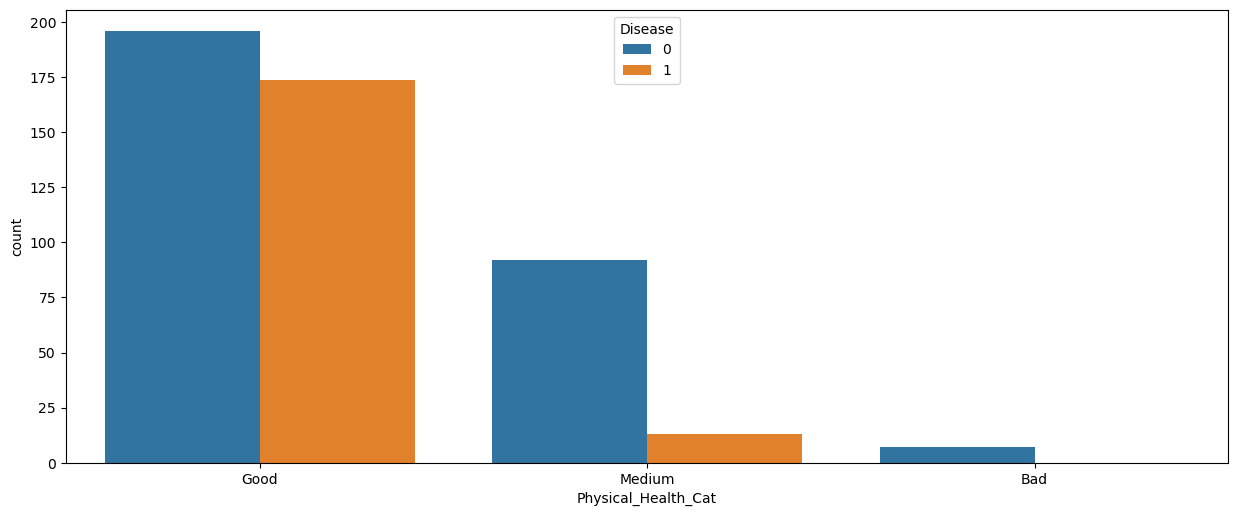

In [46]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Physical_Health_Cat", hue = "Disease", data = train_patient)
plt.show()

In [47]:
Physical_Health_Cat_counts = pd.DataFrame(train_patient['Physical_Health_Cat'].value_counts())
Physical_Health_Cat_counts['%'] = (train_patient["Physical_Health_Cat"].value_counts()/len(train_patient["Physical_Health_Cat"])*100).round(2)
Physical_Health_Cat_counts

,Physical_Health_Cat,%
Good,370,46.95
Medium,105,13.32
Bad,7,0.89


In [48]:
train_patient.BMI.describe()

count    788.000000
mean      24.059302
std        3.651810
min       16.980000
25%       20.860000
50%       24.385000
75%       27.145000
max       30.120000
Name: BMI, dtype: float64

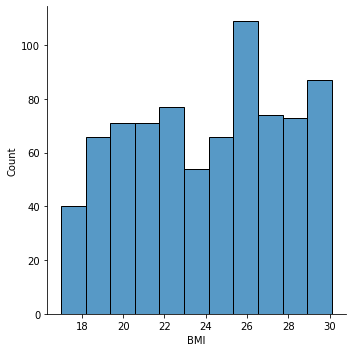

In [49]:
sns.displot(train_patient, x="BMI")

In [50]:
def BMI_categorise(df):
     train_patient['BMI_Cat'] = pd.cut(train_patient.BMI, bins = [0,18.5,25,30,float("inf")], labels = ['Underweight','Healthy','Overweight','Obesity'])
                                                                                                               
BMI_categorise(train_patient)
train_patient['BMI_Cat'].dtype

CategoricalDtype(categories=['Underweight', 'Healthy', 'Overweight', 'Obesity'], ordered=True)

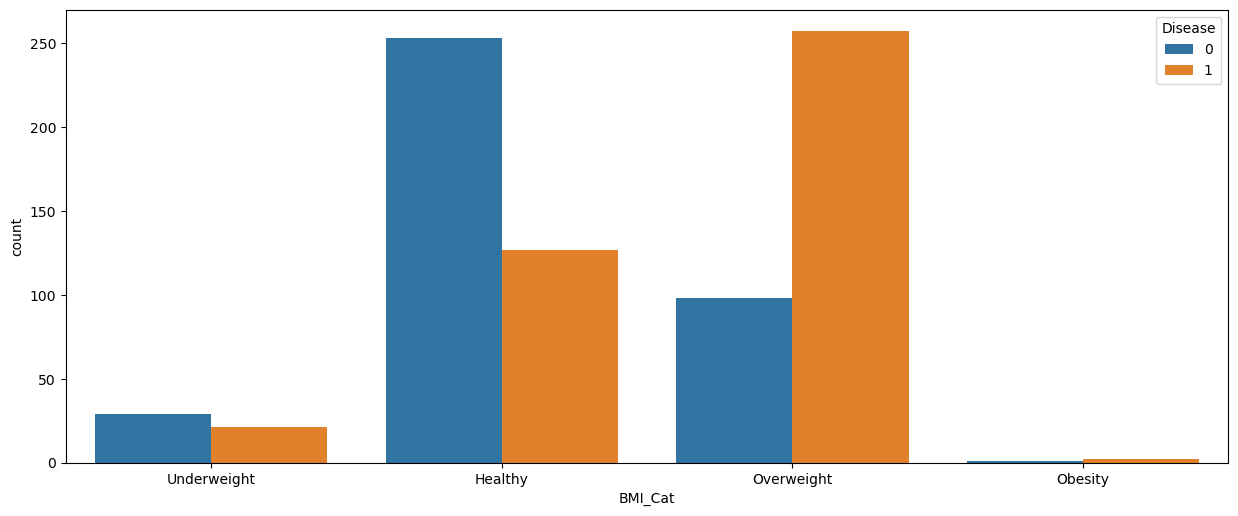

In [51]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "BMI_Cat", hue = "Disease", data = train_patient)
plt.show()

In [52]:
BMI_Cat_counts = pd.DataFrame(train_patient['BMI_Cat'].value_counts())
BMI_Cat_counts['%'] = (train_patient["BMI_Cat"].value_counts()/len(train_patient["BMI_Cat"])*100).round(2)
BMI_Cat_counts

,BMI_Cat,%
Healthy,380,48.22
Overweight,355,45.05
Underweight,50,6.35
Obesity,3,0.38


In [53]:
train_patient.Blood_Pressure.describe()

count    788.000000
mean     131.143401
std       17.075243
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: Blood_Pressure, dtype: float64

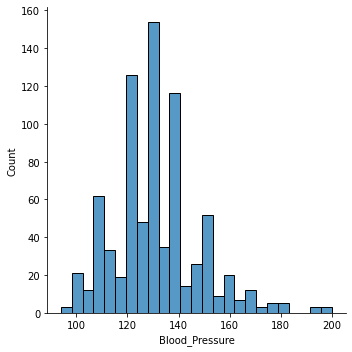

In [54]:
sns.displot(train_patient, x="Blood_Pressure")

In [55]:
def Blood_Pressure_categorise(df):
    train_patient['Blood_Pressure_Cat'] = pd.qcut(train_patient.Blood_Pressure, q=4, labels = ['Low',"Regular","High","Very High"])
    
Blood_Pressure_categorise(train_patient)
train_patient['Blood_Pressure_Cat'].dtype

CategoricalDtype(categories=['Low', 'Regular', 'High', 'Very High'], ordered=True)

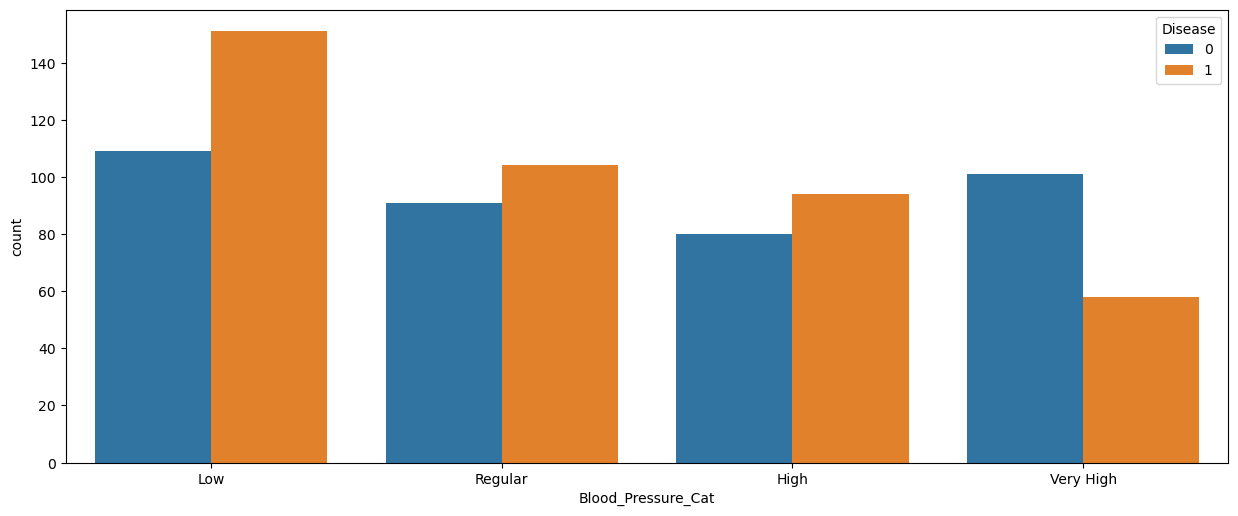

In [56]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Blood_Pressure_Cat", hue = "Disease", data = train_patient)
plt.show()

In [57]:
Blood_Pressure_Cat_counts = pd.DataFrame(train_patient['Blood_Pressure_Cat'].value_counts())
Blood_Pressure_Cat_counts['%'] = (train_patient["Blood_Pressure_Cat"].value_counts()/len(train_patient["Blood_Pressure_Cat"])*100).round(2)
Blood_Pressure_Cat_counts

,Blood_Pressure_Cat,%
Low,260,32.99
Regular,195,24.75
High,174,22.08
Very High,159,20.18


<Figure size 1500x600 with 0 Axes>

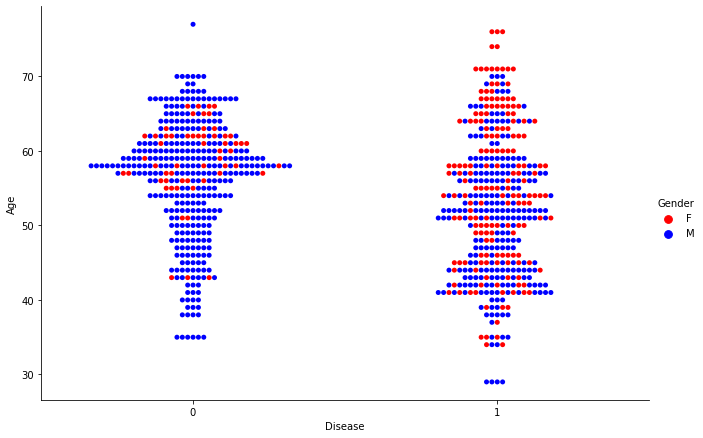

In [64]:
plt.figure(figsize=(15, 6), dpi=100)
sns.catplot(data=train_patient, y="Age", x="Disease", hue="Gender", kind="swarm", height=6, aspect=1.5,palette=sns.color_palette(['red', 'blue']))

In [ ]:
plt.figure(figsize=(15, 6), dpi=100)
sns.catplot(data=train_patient, y="Age", x="Disease", hue="Gender", kind="swarm", height=6, aspect=1.5,palette=sns.color_palette(['red', 'blue']))

(0.0, 100.0)

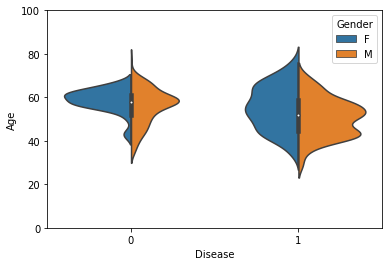

In [59]:
sns.violinplot(data=train_patient, y="Age", x="Disease", hue="Gender", split=True, height=10, aspect=5);
plt.ylim(0, 100)

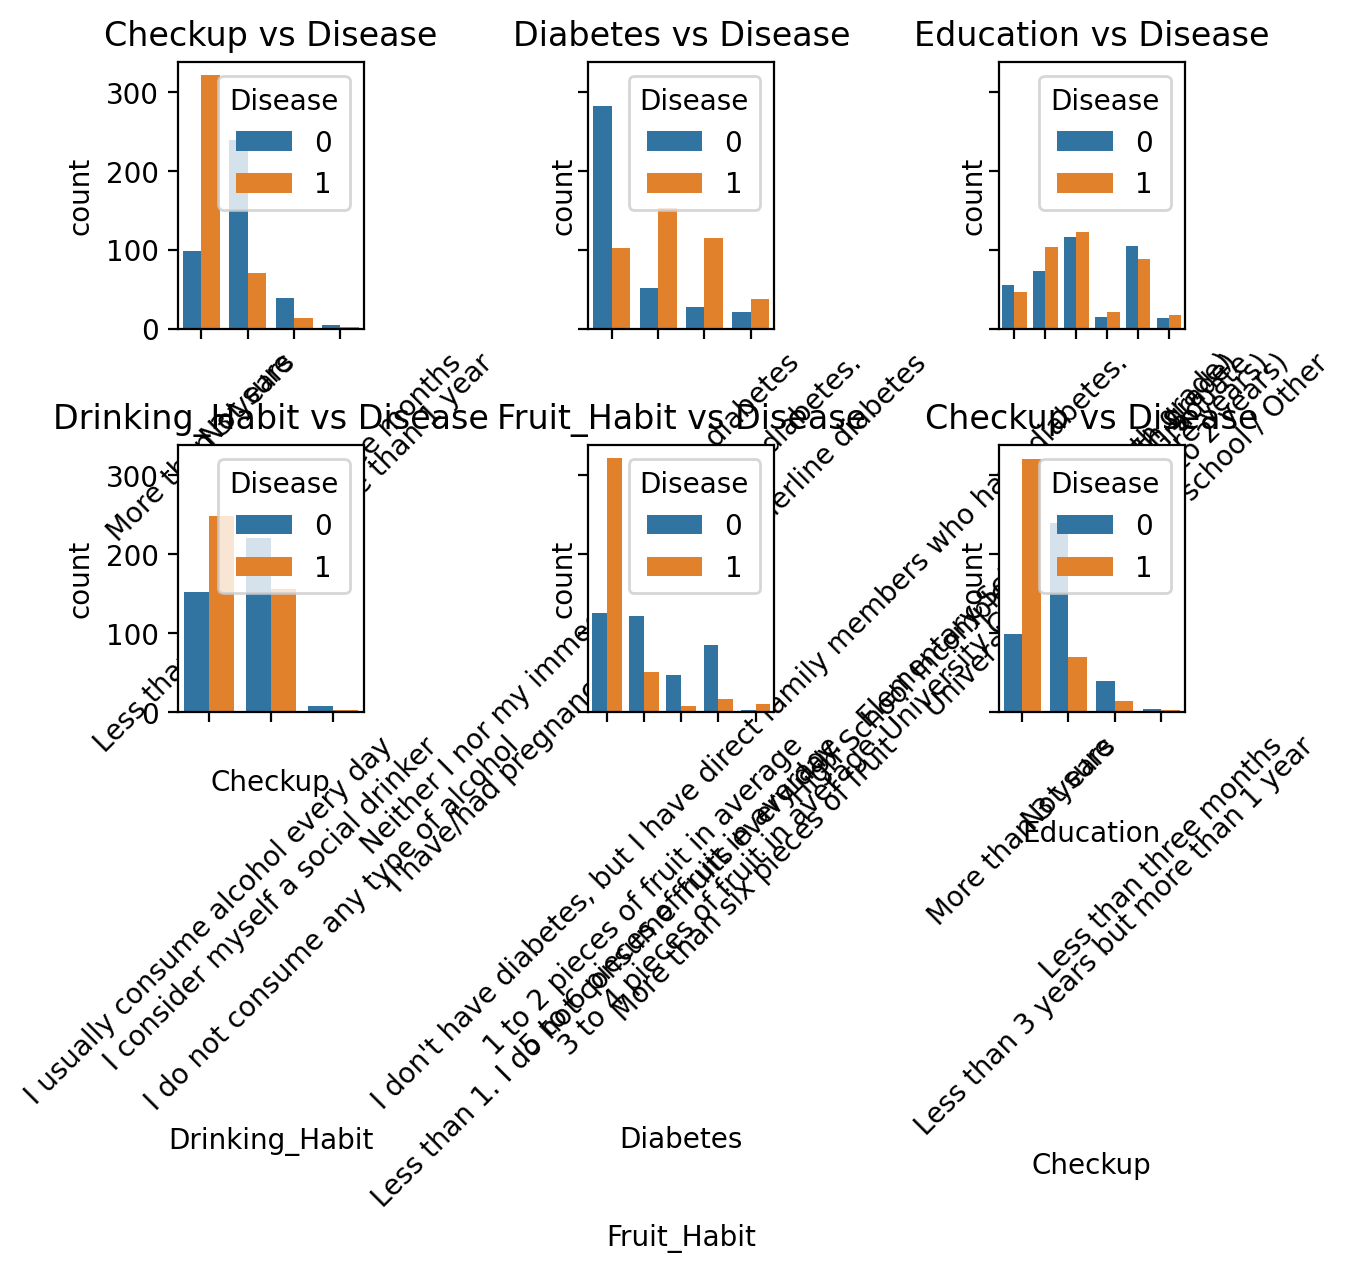

In [66]:
l=["Education","Drinking_Habit","Fruit_Habit","Checkup","Diabetes"]
figure, axes = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=False, dpi=200)
index = -2
axes = axes.flatten()
for axis in axes:
    sns.countplot(x = l[index], hue = "Disease", data = train_patient, ax=axis)
    axis.set_title(l[index]+' vs Disease')
    index = index+1
    plt.tight_layout()
    for tick in axis.get_xticklabels():
        tick.set_rotation(45)
plt.show()

In [ ]:
print((train_patient["Education"].value_counts()/len(train_patient["Education"])*100).round(2))
print(train_patient["Drinking_Habit"].value_counts())
print(train_patient["Fruit_Habit"].value_counts())
print(train_patient["Checkup"].value_counts())
print(train_patient["Diabetes"].value_counts())

In [125]:
sns.countplot(x = train_patient["Education"], hue = "Disease", data = train_patient, ax=axis)
axis.set_title(l[index]+' vs Disease')

Text(0.5, 1.0, 'Diabetes vs Disease')

In [ ]:
fazer um teste do github 1